In [1]:
import sys
sys.path.append('python-sdk/lib/')
from meli import Meli
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

%load_ext autoreload
%autoreload 2

# Inspección del dataset

Los datos están en `data_all2.csv`

In [27]:
df_all = pd.read_csv('data_all2.csv')
df_all

,prod_id,cat_id,review_id,country,prod_title,reviewer_id,review_date,review_status,review_title,review_content,review_rate,review_likes,review_dislikes
0,MLA621740496,MLA1642,31217685,MLA,Almohadones Colores Lisos 40x40 Con Cierre - S...,239242243,2018-07-24T13:38:53.000-04:00,published,Excelente,"Muy buenos almohadones, los colores son mejore...",5,1,0
1,MLA621740496,MLA1642,6964851,MLA,Almohadones Colores Lisos 40x40 Con Cierre - S...,79368646,2017-05-09T19:45:53.000-04:00,published,Muy bueno,Muy prolija confección y terminaciones.,4,1,0
2,MLA621740496,MLA1642,6589060,MLA,Almohadones Colores Lisos 40x40 Con Cierre - S...,12440335,2017-05-01T18:53:38.000-04:00,published,Excelente,Estan muy buenos y quedan muy lindos en el sil...,5,1,0
3,MLA621740496,MLA1642,7434436,MLA,Almohadones Colores Lisos 40x40 Con Cierre - S...,93444262,2017-05-19T08:47:59.000-04:00,published,Muy bueno,Muy buen producto y el mejor precio.,4,1,0
4,MLA621740496,MLA1642,66786049,MLA,Almohadones Colores Lisos 40x40 Con Cierre - S...,6611442,2020-06-20T22:52:16.000-04:00,published,Excelente,"Muy lindos, buena tela. \nGracias.",5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2581577,MLA753374110,MLA412786,51134018,MLA,"Sidra 1888 500ml, Oferta!!! Floresta, Caba",168034268,2019-12-09T11:39:25.000-04:00,published,Muy buen producto,Ok buen producto okokokokokoooooooooooooo.,3,0,0
2581578,MLA753374110,MLA412786,54084733,MLA,"Sidra 1888 500ml, Oferta!!! Floresta, Caba",58313943,2020-01-20T16:28:23.000-04:00,published,Excelente,Excelente precio y calidad de producto.,5,0,0
2581579,MLA753374110,MLA412786,56645855,MLA,"Sidra 1888 500ml, Oferta!!! Floresta, Caba",22165603,2020-02-25T19:00:03.000-04:00,published,Increíble,"Impecable, gran producto, lo recomiendo.",5,0,0
2581580,MLA753374110,MLA412786,59257571,MLA,"Sidra 1888 500ml, Oferta!!! Floresta, Caba",95220008,2020-04-07T19:40:29.000-04:00,published,Excelente,Muy bueno y práctico para toda ocasión. Recome...,5,0,0


Fijamos una cantidad de máxima de comentarios por producto

In [30]:
max_comments = 10
df_sampled = df_all.groupby('prod_id').apply(lambda x: x.sample(n=max_comments,replace=True)).reset_index(drop=True).drop_duplicates()
df_sampled['review_rate'].value_counts()

5    554910
4    118833
3     45144
1     28077
2     18139
Name: review_rate, dtype: int64

Cantidad de comentarios en cada categoría y por idioma

In [32]:
mask = df_sampled['country'] == 'MLB'
print('Comentarios en portugués:')
rates_port = df_sampled[mask]['review_rate'].value_counts().sort_index()
print(rates_port)
print('Comentarios en español:')
rates_esp = df_sampled[np.logical_not(mask)]['review_rate'].value_counts().sort_index()
print(rates_esp)
print('Comentarios totales:')
rates_port + rates_esp

Comentarios en portugués:
1     11803
2      7504
3     17010
4     39657
5    209483
Name: review_rate, dtype: int64
Comentarios en español:
1     16274
2     10635
3     28134
4     79176
5    345427
Name: review_rate, dtype: int64
Comentarios totales:


1     28077
2     18139
3     45144
4    118833
5    554910
Name: review_rate, dtype: int64

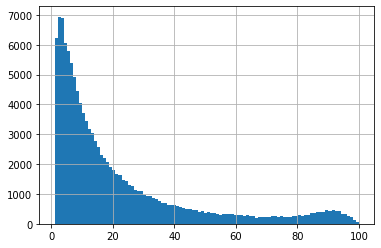

In [36]:
df_all['prod_id'].value_counts().hist(bins=100)

In [37]:
df_all.groupby('prod_id').indices

{'MCO440528836': array([1903883, 1903884, 1903885]),
 'MCO440576543': array([1945059, 1945060, 1945061]),
 'MCO441044656': array([494624, 494625, 494626, 494627, 494628, 494629, 494630, 494631,
        494632, 494633, 494634, 494635, 494636, 494637, 494638, 494639,
        494640, 494641, 494642, 494643, 494644, 494645, 494646, 494647,
        494648, 494649, 494650, 494651, 494652, 494653, 494654, 494655,
        494656, 494657, 494658, 494659, 494660, 494661, 494662, 494663,
        494664, 494665, 494666, 494667, 494668, 494669, 494670, 494671,
        494672, 494673, 494674, 494675, 494676, 494677, 494678, 494679,
        494680, 494681, 494682, 494683]),
 'MCO441677653': array([1422657, 1422658, 1422659, 1422660, 1422661, 1422662, 1422663,
        1422664, 1422665, 1422666, 1422667]),
 'MCO441770327': array([1736380, 1736381, 1736382, 1736383, 1736384, 1736385, 1736386]),
 'MCO442751189': array([2039142, 2039143, 2039144, 2039145, 2039146]),
 'MCO444855952': array([1295355, 129535